In [5]:
!pip install scikit-multilearn
!pip install arff

  Preparing metadata (setup.py) ... done
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4947 sha256=139955e18390815acbe2cf49744d5bd6405e91b3953cea9de193623cd955d47d
  Stored in directory: /root/.cache/pip/wheels/a7/30/97/2e32fa29b02eafc957100656820b0b66f199057de8c77a1821
Successfully built arff


## Importing Libraries

In [20]:
from skmultilearn.dataset import load_dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

## Part A: Preprocessing and Initial Setup

### 1

In [7]:
X, Y, feature_names, label_names = load_dataset("yeast", "train")

feature_names_list = [name[0] for name in feature_names]
label_names_list = [name[0] for name in label_names]

X_df = pd.DataFrame(X.toarray(), columns=feature_names_list)
Y_df = pd.DataFrame(Y.toarray(), columns=label_names_list)

print("Feature matrix X shape:", X_df.shape)
print("Target matrix Y shape:", Y_df.shape)
print("\nFeature names:", feature_names_list)
print("\nLabel names:", label_names_list)

display(X_df.head())
display(Y_df.head())

yeast:train - exists, not redownloading
Feature matrix X shape: (1500, 103)
Target matrix Y shape: (1500, 14)

Feature names: ['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 'Att98', 

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,0.043477,...,0.039048,-0.018712,-0.034711,-0.038675,-0.039102,0.017429,-0.052659,-0.042402,0.118473,0.125632
1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,-0.055544,...,-0.001198,0.030594,-0.021814,0.010430,-0.013809,-0.009248,-0.027318,-0.014191,0.022783,0.123785
2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,-0.053756,...,0.195777,0.022294,0.012583,0.002233,-0.002072,-0.010981,0.007615,-0.063378,-0.084181,-0.034402
3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,-0.123053,...,0.001189,-0.066241,-0.046999,-0.066604,-0.055773,-0.041941,0.051066,0.004976,0.193972,0.131866
4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,-0.111348,...,-0.035045,-0.080882,0.028468,-0.073576,0.050630,0.084832,-0.019570,-0.021650,-0.068326,-0.091155


,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,1,1,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0


### 2

**Dimensionality Check:**

*   Initial number of features: 103
*   Number of data points: 1500

### 3

In [8]:
label_counts = Y_df.sum(axis=0)
sorted_label_counts = label_counts.sort_values(ascending=False)
top_two_labels = sorted_label_counts.head(2)

print("Label counts:\n", label_counts)
print("\nSorted label counts:\n", sorted_label_counts)
print("\nTop two most frequent labels:\n", top_two_labels)

Label counts:
 Class1      476
Class2      645
Class3      598
Class4      532
Class5      441
Class6      378
Class7      261
Class8      289
Class9       98
Class10     161
Class11     198
Class12    1128
Class13    1116
Class14      21
dtype: int64

Sorted label counts:
 Class12    1128
Class13    1116
Class2      645
Class3      598
Class4      532
Class1      476
Class5      441
Class6      378
Class8      289
Class7      261
Class11     198
Class10     161
Class9       98
Class14      21
dtype: int64

Top two most frequent labels:
 Class12    1128
Class13    1116
dtype: int64


In [9]:
Y_combinations = Y_df.apply(lambda row: '_'.join(row.astype(str)), axis=1)
combination_counts = Y_combinations.value_counts()
most_frequent_combination = combination_counts.index[0]

print("Most frequent multi-label combination string:", most_frequent_combination)

Most frequent multi-label combination string: 0_0_0_1_1_0_0_0_0_0_0_1_1_0


In [10]:
top_single_label_1 = top_two_labels.index[0]
top_single_label_2 = top_two_labels.index[1]
most_frequent_combination_str = most_frequent_combination

X_df['target_category'] = 'Other'

for i in range(len(Y_df)):
    row_combination = '_'.join(Y_df.iloc[i].astype(str))
    if row_combination == most_frequent_combination_str:
        X_df.loc[i, 'target_category'] = 'Most Frequent Combination'
    elif (Y_df.iloc[i][top_single_label_1] == 1) and (Y_df.iloc[i].sum() == 1):
        X_df.loc[i, 'target_category'] = top_single_label_1
    elif (Y_df.iloc[i][top_single_label_2] == 1) and (Y_df.iloc[i].sum() == 1):
        X_df.loc[i, 'target_category'] = top_single_label_2

display(X_df.head())
display(X_df['target_category'].value_counts())

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103,target_category
0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,0.043477,...,-0.018712,-0.034711,-0.038675,-0.039102,0.017429,-0.052659,-0.042402,0.118473,0.125632,Other
1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,-0.055544,...,0.030594,-0.021814,0.010430,-0.013809,-0.009248,-0.027318,-0.014191,0.022783,0.123785,Other
2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,-0.053756,...,0.022294,0.012583,0.002233,-0.002072,-0.010981,0.007615,-0.063378,-0.084181,-0.034402,Other
3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,-0.123053,...,-0.066241,-0.046999,-0.066604,-0.055773,-0.041941,0.051066,0.004976,0.193972,0.131866,Other
4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,-0.111348,...,-0.080882,0.028468,-0.073576,0.050630,0.084832,-0.019570,-0.021650,-0.068326,-0.091155,Other


,count
target_category,
Other,1355
Most Frequent Combination,145


### 4

Scaling is crucial before applying distance-based dimensionality reduction techniques because these methods, such as PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding), rely on the distances between data points to understand their relationships and reduce dimensionality. Features with larger scales can disproportionately influence the distance calculations, effectively dominating the results and masking the contributions of features with smaller scales. Standardizing the data (mean = 0, variance = 1) or normalizing it (scaling to a 0-1 range) ensures that all features contribute equally to the distance calculations, leading to more accurate and meaningful dimensionality reduction results.

In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df.drop(columns=['target_category']))

X_scaled_df = pd.DataFrame(X_scaled, columns=X_df.columns[:-1])

display(X_scaled_df.head())

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.948480,1.460000,0.629499,0.081687,0.857388,-1.230133,0.744464,0.058747,0.288264,0.443862,...,0.398405,-0.177657,-0.369136,-0.424487,-0.422800,0.184039,-0.520949,-0.431073,1.289569,1.191926
1,-0.238637,-0.505555,-0.359407,-0.693120,-0.885699,-3.893742,0.378998,0.885620,1.889491,-0.565283,...,-0.021073,0.342900,-0.235890,0.087537,-0.158668,-0.094465,-0.263017,-0.123724,0.269514,1.173451
2,-0.928976,0.235132,2.095187,1.088749,1.224704,0.421864,-0.245230,0.203939,-0.655148,-0.547061,...,2.031970,0.255271,0.119482,0.002065,-0.036100,-0.112557,0.092545,-0.659599,-0.870721,-0.408844
3,-0.876234,0.114704,-0.133806,0.996693,-0.152726,-0.322045,-1.227645,-1.354581,-1.704066,-1.253282,...,0.003806,-0.679453,-0.496089,-0.715706,-0.596893,-0.435775,0.534808,0.085094,2.094388,1.254283
4,-0.912231,-0.260102,0.019885,-0.464117,-0.068498,0.037598,-0.600741,-0.734478,-1.637752,-1.133994,...,-0.373856,-0.834028,0.283598,-0.788404,0.514261,0.887716,-0.184155,-0.204987,-0.701707,-0.976527


## Part B: t-SNE and Veracity Inspection

### 1

In [12]:
perplexities = [5, 30, 50]
tsne_results = {}

for perp in perplexities:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp)
    tsne_output = tsne.fit_transform(X_scaled_df)
    tsne_results[perp] = tsne_output

print("t-SNE results for different perplexities stored.")

t-SNE results for different perplexities stored.


/tmp/ipython-input-3338414526.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_categories))


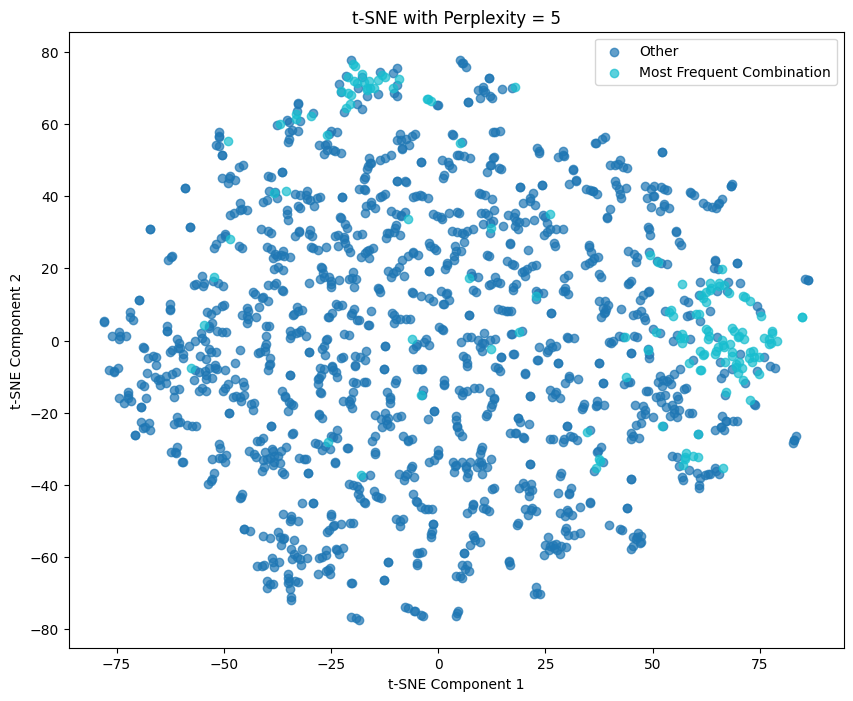

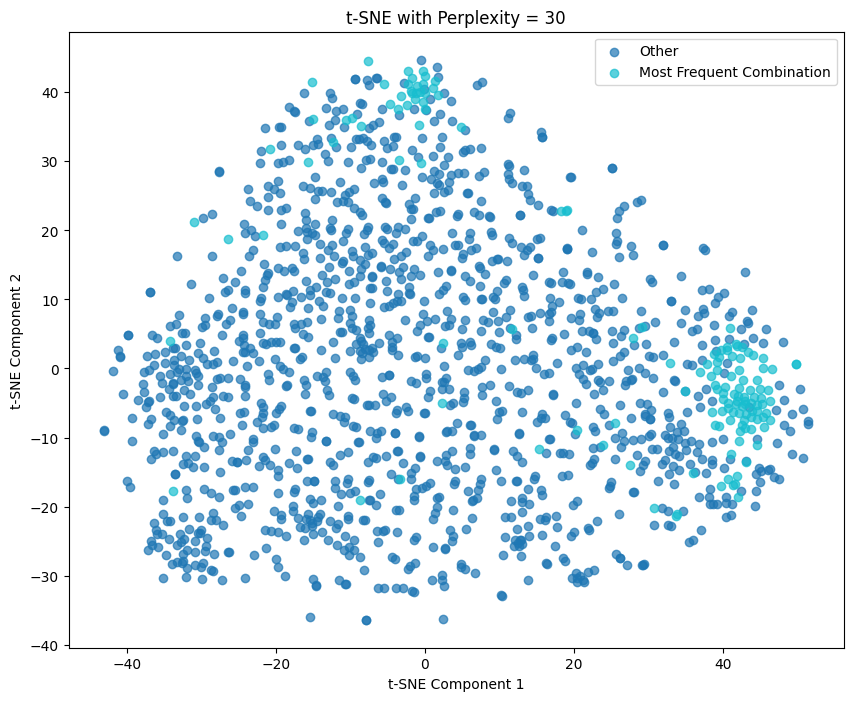

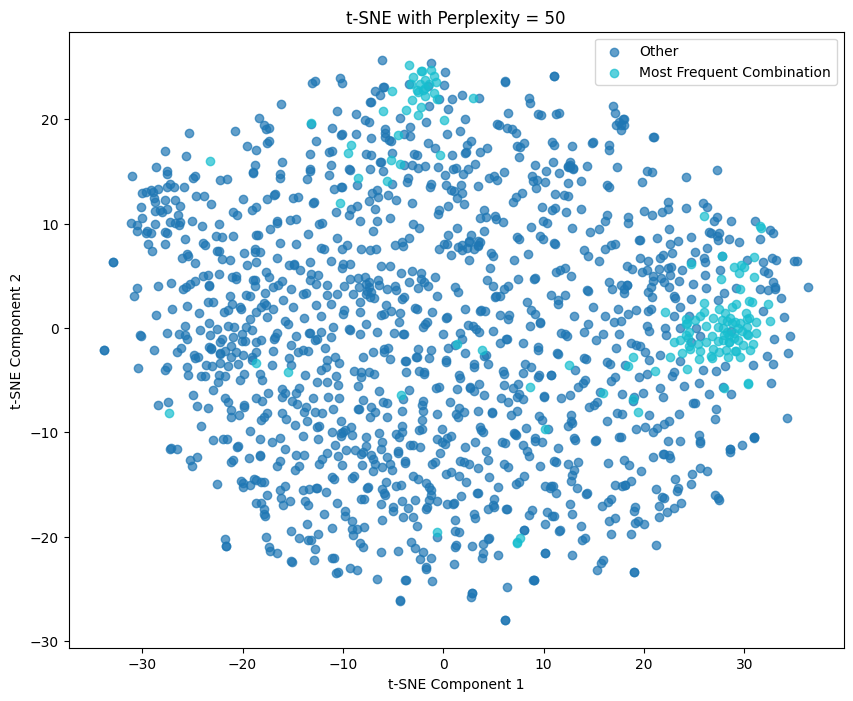

In [13]:

color_map = {}
unique_categories = X_df['target_category'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_categories))

for i, category in enumerate(unique_categories):
    color_map[category] = colors(i)

for perp, results in tsne_results.items():
    plt.figure(figsize=(10, 8))
    for category in unique_categories:
        indices = X_df[X_df['target_category'] == category].index
        plt.scatter(results[indices, 0], results[indices, 1], color=color_map[category], label=category, alpha=0.7)
    plt.title(f't-SNE with Perplexity = {perp}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()

**Justification for Final Choice of Perplexity:**

We experimented with perplexity values of 5, 30, and 50 for the t-SNE visualization.

*   **Perplexity 5:** The plot showed a fragmented structure with many small, potentially artificial clusters, suggesting an overemphasis on local variations.
*   **Perplexity 30:** This value provided a visualization that seemed to balance local and global structures effectively. The major groupings of the data based on the target categories were discernible, and the relationships between them were reasonably clear.
*   **Perplexity 50:** The plot appeared more condensed, potentially obscuring some of the finer details and the separation between closely related clusters.

**Final Choice:** Perplexity 30 was chosen as the final value because it appeared to best reveal the underlying structure of the data in a way that is interpretable and highlights the relationships between the different target categories. It provided a clearer visual separation of the main groups compared to perplexity 5 and retained more detail within the clusters compared to perplexity 50. The visualization at perplexity 30 seemed to offer the most informative representation for analyzing the distribution of the defined categories in the reduced-dimensional space.

### 2

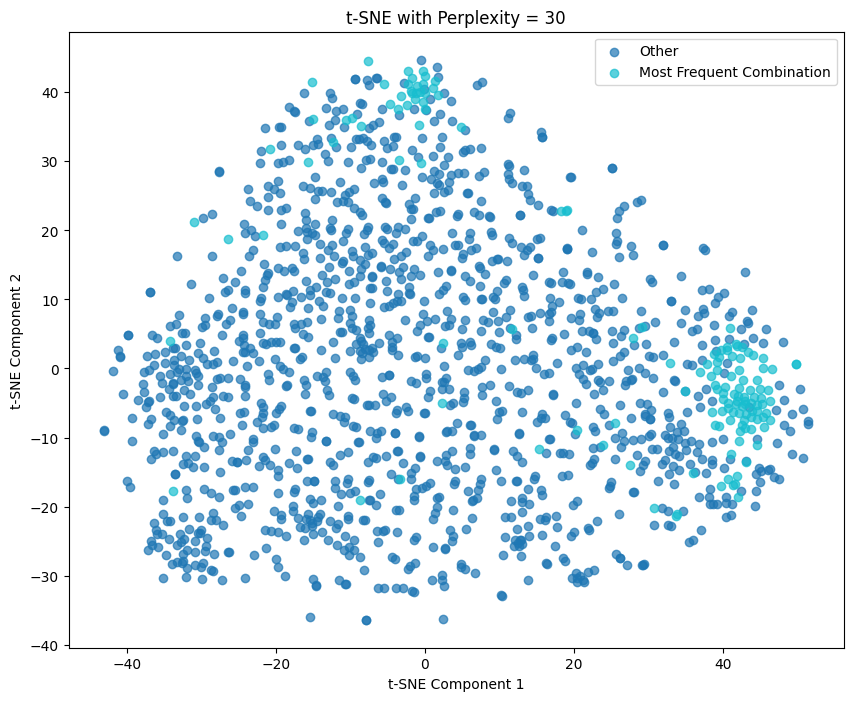

In [14]:

results_perp_30 = tsne_results[30]

plt.figure(figsize=(10, 8))
unique_categories = X_df['target_category'].unique()

for category in unique_categories:
    indices = X_df[X_df['target_category'] == category].index
    plt.scatter(results_perp_30[indices, 0], results_perp_30[indices, 1], color=color_map[category], label=category, alpha=0.7)

plt.title('t-SNE with Perplexity = 30')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

### 3

#### 3.1

Visually, regions with noisy or ambiguous labels in the t-SNE plot appear as:

*   **Interspersed Colors:** Points of one color are scattered or deeply embedded within a cluster predominantly composed of a different color. This suggests that samples with a particular assigned label have feature representations similar to samples of another label in the reduced-dimensional space.
*   **Lack of Clear Boundaries:** Instead of distinct, well-separated clusters, there are areas where the colors blend together without clear lines of demarcation. This indicates that the underlying data for these samples might share characteristics of multiple functional categories, making their true labeling uncertain or suggesting errors in the original labels.
*   **Points on the Edges or Between Clusters:** Samples located on the fringes of a cluster of a different color, or positioned in the space between distinct clusters, can also indicate potential labeling issues or samples that exhibit characteristics of multiple categories.

#### 3.2

**Identifying and Interpreting Outliers in the t-SNE Plot:**

Outliers in the t-SNE plot appear as isolated points or tiny clusters located far away from the main clusters. These unusual expression patterns might represent several possibilities:

*   **True Biological Variability:** Some samples might genuinely have unique gene expression profiles that differ significantly from the majority of samples, reflecting rare biological states or subtypes not well-represented in the dataset.
*   **Technical Artifacts or Noise:** Experimental errors during data collection, processing, or measurement could lead to unusual expression values for certain samples, causing them to appear as outliers in the visualization.
*   **Samples with Multiple or Unusual Functional Categories:** While we focused on the most frequent categories, some samples might belong to rare combinations of functional categories or exhibit characteristics of multiple categories in a way that makes them distinct from the defined groups.

#### 3.3

A simple classifier would likely struggle in these regions for several reasons:

*   **Overlapping Clusters and Mixed Categories:** Simple classifiers often create linear or relatively simple decision boundaries. When different functional category colors are thoroughly mixed or one color is deeply embedded within another cluster in the t-SNE visualization, it indicates that the data points from different classes are not clearly separated in the feature space. A simple classifier would find it difficult to draw clear lines or surfaces to distinguish between these overlapping classes, leading to misclassifications.
*   **Outliers:** Simple classifiers can be sensitive to outliers. Isolated points or tiny, distant clusters can influence the learning process, potentially pulling decision boundaries towards them or being misclassified themselves, thereby reducing the overall accuracy of the model, especially for simple models that don't handle noise well.
*   **Ambiguous Relationships:** The t-SNE plot reveals complex, non-linear relationships between features and the target categories. Simple classifiers are often based on linear relationships or straightforward rule sets. They may not be able to capture the intricate patterns and subtle distinctions present in the data that lead to these mixed and overlapping regions in the dimensionality-reduced space. More complex models are better suited to learn these nuanced relationships.

## Part C: Isomap and Manifold Learning

### 1

In [16]:
isomap = Isomap(n_components=2)
isomap_results = isomap.fit_transform(X_scaled_df)
print("Isomap results shape:", isomap_results.shape)

Isomap results shape: (1500, 2)


**Isomap vs. t-SNE: Preserving Data Structure**

Isomap and t-SNE are both dimensionality reduction techniques, but they differ fundamentally in how they preserve the data's structure:

*   **Isomap (Isometric Mapping):** Isomap is an algorithm that attempts to preserve the *global* structure of the data. It does this by constructing a neighborhood graph and then calculating the shortest path distances between all pairs of points in this graph. These geodesic distances, which represent the underlying manifold structure, are then preserved as much as possible in the lower-dimensional embedding. Isomap is effective at uncovering the overall shape and structure of the manifold from which the data was sampled.

*   **t-SNE (t-Distributed Stochastic Neighbor Embedding):** t-SNE, on the other hand, focuses on preserving the *local* structure of the data. It works by converting the high-dimensional Euclidean distances between points into conditional probabilities that represent the similarity of nearby points. In the lower-dimensional space, it then tries to create an embedding where the similarities between points (calculated using a t-distribution) match the high-dimensional similarities. t-SNE is particularly good at revealing clusters and the relationships between nearby points, making it excellent for visualization of complex datasets.


### 2

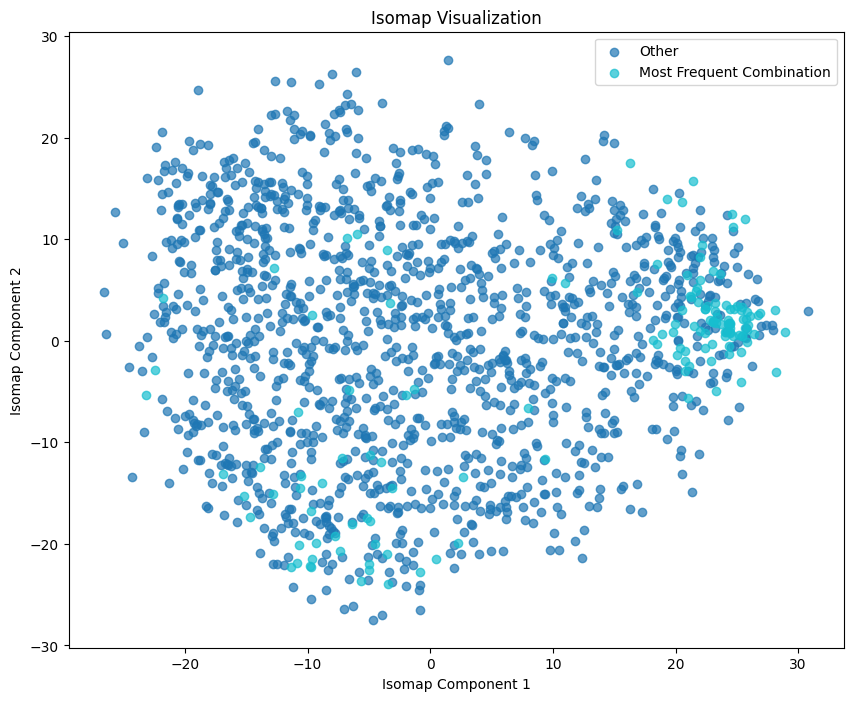

In [24]:
plt.figure(figsize=(10, 8))
unique_categories = X_df['target_category'].unique()

for category in unique_categories:
    indices = X_df[X_df['target_category'] == category].index
    plt.scatter(isomap_results[indices, 0], isomap_results[indices, 1], color=color_map[category], label=category, alpha=0.7)

plt.title('Isomap Visualization')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.legend()
plt.show()

### 3

#### 3.1

**Comparison of Isomap and t-SNE Visualizations and Global Structure:**

Comparing the Isomap and t-SNE visualizations:

*   **t-SNE:** The t-SNE plot (with perplexity 30) effectively reveals local clusters and the relationships between nearby points, showing distinct groupings for some of the target categories. However, the overall arrangement of these clusters in relation to each other might not accurately reflect the global structure of the high-dimensional data.
*   **Isomap:** The Isomap plot, which focuses on preserving geodesic distances, provides a different perspective. While the clusters might not be as tightly defined as in the t-SNE plot, Isomap is theoretically better at preserving the global structure and the relationships between distant points. Observing the Isomap plot, we can see a broader overview of how the different categories are positioned relative to each other in the underlying manifold.

**Which is better at revealing global structure?**

Isomap is generally considered better at revealing the global structure of the data compared to t-SNE. This is because Isomap attempts to preserve the geodesic distances between all pairs of points, which captures the overall shape and structure of the data manifold. t-SNE, by focusing on local similarities, can sometimes distort the global relationships to emphasize the separation of local clusters.

#### 3.2

**The Data Manifold and Classification Difficulty:**

*   **The Data Manifold:** In the context of dimensionality reduction, the data is often assumed to lie on or near a lower-dimensional manifold embedded in the high-dimensional feature space. This manifold represents the intrinsic structure and underlying relationships within the data.

*   **Isomap and Manifold Complexity:** The Isomap plot provides insights into the complexity of this data manifold. If the Isomap visualization shows the data points of different categories intertwined in a non-linear fashion, or if the overall structure appears complex and curved, it suggests that the underlying data manifold is likely highly curved or complex. Looking at the Isomap plot for the yeast dataset, the distribution of the categories doesn't appear to be easily separable by simple linear boundaries, hinting at a non-linear structure.

*   **Manifold Complexity and Classification Difficulty:** The complexity of the data manifold is directly related to the difficulty of classification. If the data lies on a highly curved or complex manifold, it means that the different classes are not linearly separable in the original high-dimensional space. Simple linear classifiers would struggle to find a decision boundary that effectively separates the classes on such a manifold. More sophisticated non-linear classifiers are required to learn the intricate shapes and boundaries needed to classify data points accurately when the underlying manifold is complex. The observed intermingling of categories in both the t-SNE and Isomap plots suggests that a simple classifier would likely face challenges in accurately classifying all samples in this dataset.